<a href="https://colab.research.google.com/github/Raushan787/Well-Test-Analysis/blob/main/Pressure_Drawdown_Test_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
#Loading Reservoir Parameters
q=125 #std/day
Pi=2760 #psi
phie=0.15
h=50  #ft
c_t=1.5*np.power(10.0,-6) #1/psi
u=2.1  #cp
Bo=1.14 #rb/stb
rw=.325 #ft

In [159]:
#Loading dataset
df=pd.read_csv("Drawdown_test_data.csv")
df.head()

,time,pressure
0,0.0010,2743.96
1,0.0021,2737.52
2,0.0034,2730.16
3,0.0048,2722.32
4,0.0064,2713.83


In [160]:
df.shape

(78, 2)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      78 non-null     float64
 1   pressure  78 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [162]:
df.describe()

,time,pressure
count,78.000000,78.000000
mean,8.883060,2409.228462
std,16.719921,148.266199
min,0.001000,2262.990000
25%,0.079025,2301.022500
50%,0.832500,2343.140000
75%,8.099250,2490.707500
max,72.000000,2743.960000


In [163]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

#**Cartesian Plot**#

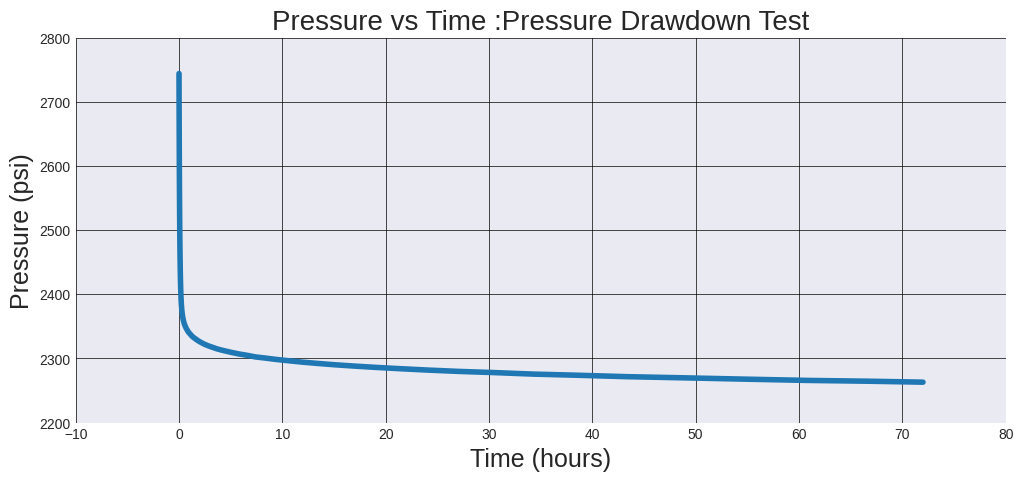

In [164]:
#Plot on cartesian plot
plt.figure(figsize=(12,5))
plt.style.use("seaborn-v0_8-darkgrid")
plt.plot(df["time"],df["pressure"],lw=4)
plt.xlabel("Time (hours)",fontsize=18)
plt.ylabel("Pressure (psi)",fontsize=18)
plt.title("Pressure vs Time :Pressure Drawdown Test",fontsize=20)
plt.grid(axis="both",which="major",linestyle="-",lw=.5,color="black")
plt.ylim(2200,2800)
plt.xlim(-10,80)
plt.show()

Since pressure is decreased with time so it is drawdown pressure test

#**Semi-Log Plot**#

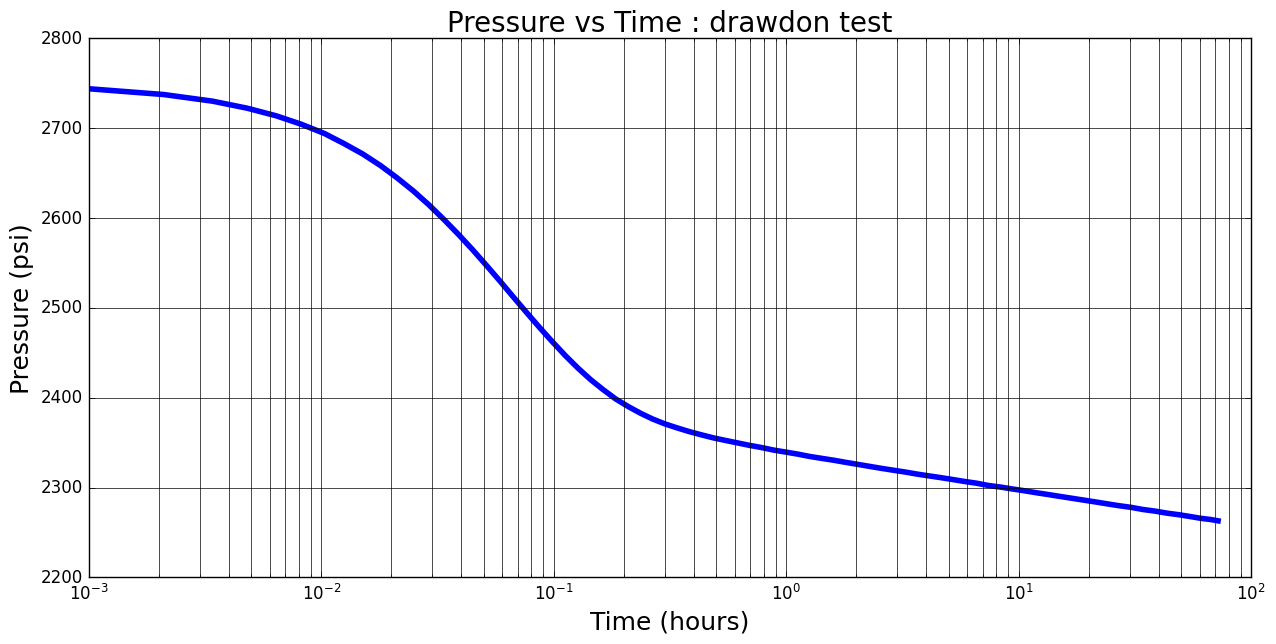

In [165]:
#Semi log plot
plt.figure(figsize=(15,7))
plt.style.use("classic")
plt.semilogx(df["time"],df["pressure"],lw=4)
plt.xlabel("Time (hours)",fontsize=18)
plt.ylabel("Pressure (psi)",fontsize=18)
plt.title("Pressure vs Time : drawdon test",fontsize=20)
plt.grid(True,which="both",color="black",linestyle="-",alpha=1)
plt.show()


#**Diagnostic Plot**#

In [166]:
#Adding pressure diffrence column in dataset
df["delta_P"]=Pi-df["pressure"]

#Calculation of dp =  Consecutive difference in delta Pressure
df["d(delta_P)"]=np.zeros(len(df))
df["d(delta_P)"].iloc[1:]=np.diff(df["delta_P"])

# dt=Consecutive difference in delta Time (deltaTime=Time since initial Time=0)
df["dt"]=np.zeros(len(df))
df["dt"].iloc[1:]=np.diff(df["time"])
#Pdash=dp/dlogt=t*(dp/dt)
#Pdash=t*dp/dt
df["Pdash"]=np.zeros(len(df))
df["Pdash"].iloc[1:]=df["time"].iloc[1:] * df["d(delta_P)"].iloc[1:] / df["dt"].iloc[1:]

<ipython-input-166-c9a89f7c4592>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["d(delta_P)"].iloc[1:]=np.diff(df["delta_P"])
<ipython-input-166-c9a89f7c4592>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.

In [167]:
df.head()

,time,pressure,delta_P,d(delta_P),dt,Pdash
0,0.0010,2743.96,16.04,0.00,0.0000,0.000000
1,0.0021,2737.52,22.48,6.44,0.0011,12.294545
2,0.0034,2730.16,29.84,7.36,0.0013,19.249231
3,0.0048,2722.32,37.68,7.84,0.0014,26.880000
4,0.0064,2713.83,46.17,8.49,0.0016,33.960000


In [168]:
df.tail()

,time,pressure,delta_P,d(delta_P),dt,Pdash
73,48.79,2269.77,490.23,1.77,5.42,15.933266
74,54.79,2267.69,492.31,2.08,6.00,18.993867
75,60.79,2265.73,494.27,1.96,6.00,19.858067
76,66.79,2264.46,495.54,1.27,6.00,14.137217
77,72.00,2262.99,497.01,1.47,5.21,20.314779


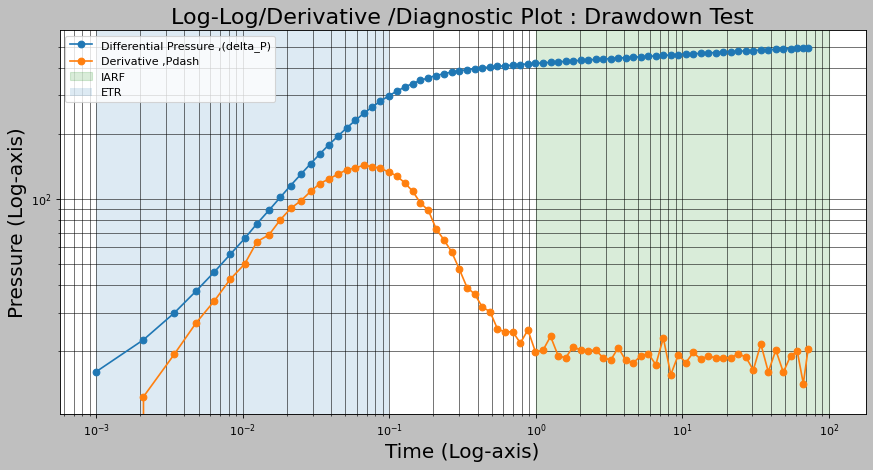

In [169]:
#Diagnostic plot
plt.figure(figsize=(13,6))
plt.style.use("default")
plt.loglog(df["time"],df["delta_P"],marker="o",label="Differential Pressure ,(delta_P)")
plt.loglog(df["time"],df["Pdash"],marker="o",label="Derivative ,Pdash")
plt.axvspan(1,100,color="green",alpha=0.15,label="IARF")
plt.axvspan(0.001,0.1,alpha=.15,label="ETR")
plt.xlabel("Time (Log-axis)",fontsize=18)
plt.ylabel("Pressure (Log-axis)",fontsize=18)
plt.title("Log-Log/Derivative /Diagnostic Plot : Drawdown Test",fontsize=20)
plt.legend()
plt.grid(True,which="both",color="black",alpha=.60)

#**Middle Time Region Analysis  (IARF)**#

In [170]:
tmin_iarf=1 #hr
tmax_iarf=65 #hr

In [171]:
#Creating dataframe of data lies in IAFR
df_semilog=df[(df["time"]>=tmin_iarf)&(df["time"]<=tmax_iarf)]
df_semilog.head()


,time,pressure,delta_P,d(delta_P),dt,Pdash
41,1.118,2337.28,422.72,2.25,0.125,20.124000
42,1.259,2334.67,425.33,2.61,0.141,23.304894
43,1.417,2332.55,427.45,2.12,0.158,19.012911
44,1.595,2330.48,429.52,2.07,0.178,18.548596
45,1.795,2328.15,431.85,2.33,0.200,20.911750


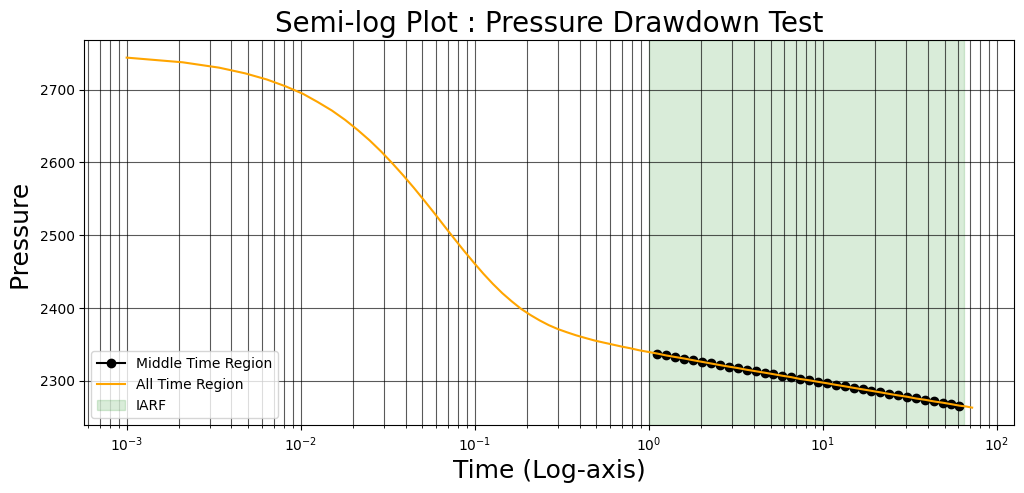

In [172]:
#Semilog plot
plt.figure(figsize=(12,5))
plt.style.use("default")
plt.semilogx(df_semilog["time"],df_semilog["pressure"],marker="o",color="black",label="Middle Time Region")
plt.semilogx(df["time"],df["pressure"],color="orange",label="All Time Region")
plt.axvspan(tmin_iarf,tmax_iarf,color="green",alpha=0.15,label="IARF")
plt.xlabel("Time (Log-axis)",fontsize=18)
plt.ylabel("Pressure ",fontsize=18)
plt.title("Semi-log Plot : Pressure Drawdown Test",fontsize=20)
plt.grid(True,which="both",color="black",alpha=.65)
plt.legend(loc="best")

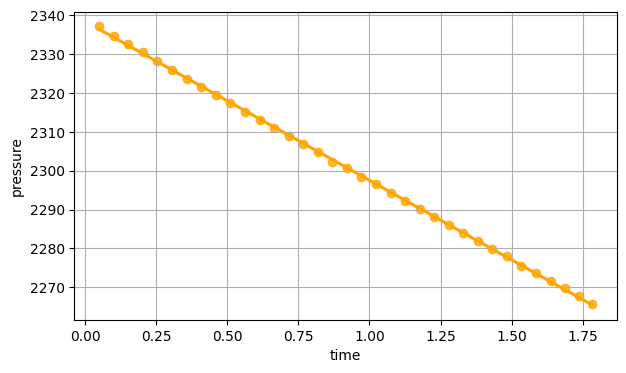

In [173]:
#Regression plot
plt.figure(figsize=(7,4))
plt.style.use("default")
t=np.log10(df_semilog[["time"]])
p=df_semilog["pressure"]
sns.regplot(x=t,y=p,
              color="orange",
              marker="o"
              )
plt.grid()

 **Linear Regression for finding Permeability**

**Pwf=-m X log(t) +c**

In [174]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(t,p)

LinearRegression()

In [175]:
#Calculation Of R-Squared Value
lm.score(t,p)


0.999831860457584

Since R-squared value is 0.9998 show best fit the data

In [176]:
#Slope of the straight line
lm.coef_

array([-40.88153057])

In [177]:
#Intercept (Pwh at 1hr )
lm.intercept_

np.float64(2338.384401112793)

Equation straight Line is::

**Pwf=-40.88* log(t) + 2338.384**

In [178]:
#Pwf at 1hr
Pwf_1hr=-40.88*np.log(1)+2338.384
Pwf_1hr

np.float64(2338.384)

In [179]:
#Slope of straight line fit in semilog plot in MTR
m=np.abs(lm.coef_[0])
m

np.float64(40.88153057045186)

 **Permeability**

**k=162.6*q*u*Bo/m*h**

In [180]:
k=162.6*q*u*Bo/(m*h)
k

np.float64(23.804416968267233)

In [181]:
print("The permeability of reservoir is :",np.round(k,3),"mD")

The permeability of reservoir is : 23.804 mD


**Skin**

**s=1.151*{((Pi-Pwf_1hr)/m)+3.23-log((k/phie X u X ct X rw^2))}**

In [182]:
s=1.151*((Pi-Pwf_1hr)/m +3.23-np.log10((k)/(phie*u*c_t*rw*rw)))
s

np.float64(5.599186588958965)

In [183]:
print("The skin factor is :",np.round(s,2))

The skin factor is : 5.6


In [184]:
print("Pressure loss due to skin is : ",np.round(0.87*m*s,2),"psi")

Pressure loss due to skin is :  199.15 psi


#**Early Time Region**#

In [185]:
df_etr=df[(df["time"]>0.001) & (df["time"]<.1)]
df_etr.head(5)

,time,pressure,delta_P,d(delta_P),dt,Pdash
1,0.0021,2737.52,22.48,6.44,0.0011,12.294545
2,0.0034,2730.16,29.84,7.36,0.0013,19.249231
3,0.0048,2722.32,37.68,7.84,0.0014,26.880000
4,0.0064,2713.83,46.17,8.49,0.0016,33.960000
5,0.0082,2704.46,55.54,9.37,0.0018,42.685556


In [186]:
df_etr.shape

(21, 6)

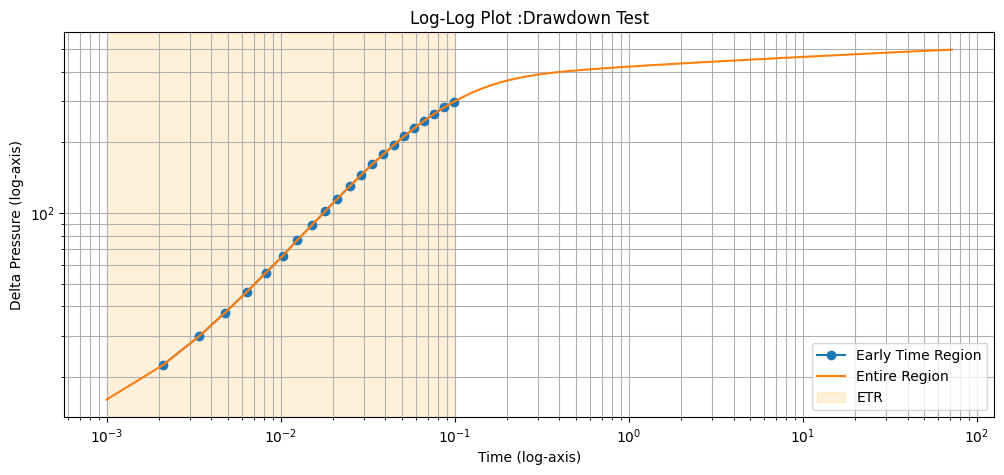

In [187]:
plt.figure(figsize=(12,5))
plt.loglog(df_etr["time"],df_etr["delta_P"],label="Early Time Region",marker="o")
plt.loglog(df["time"],df["delta_P"],label="Entire Region")
plt.axvspan(0.001,.1,label="ETR",color="orange",alpha=.15)
plt.xlabel("Time (log-axis)")
plt.ylabel("Delta Pressure (log-axis)")
plt.title("Log-Log Plot :Drawdown Test")
plt.grid(True,which="both")
plt.legend()



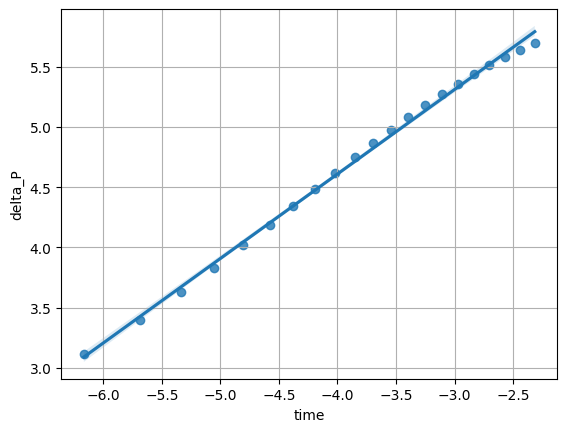

In [188]:
sns.regplot(x=np.log(df_etr["time"]),y=np.log(df_etr["delta_P"]))
plt.grid()


 **log(Pi-Pwf)=log(t) +c**

In [189]:
#Fitting unit slope line
t=np.log10(df_etr[["time"]])
p=np.log10(df_etr["delta_P"])
lm.fit(t,p)

LinearRegression()

In [190]:

#Slope
np.abs(lm.coef_[0])

np.float64(0.7016435279828189)

In [191]:

#Intercept
lm.intercept_

np.float64(3.2207202527659256)

In [192]:
lm.score(t,p)

0.9973491365962068

Theorectically slope should be 1
but we get nearly 0.70.Let calculate on this

 Wellbore Storage Coefficient (C)**bold text**

 **C=q*Bo* X (delta_T/delta_P)/24**

In [193]:
C=q*Bo*df_etr["time"][4]/(df_etr["delta_P"][4])/24
C

np.float64(0.0008230452674897106)

In [194]:
print("The wellobre storage coefficient is :",np.round(C,3),"rbbl/psi")

The wellobre storage coefficient is : 0.001 rbbl/psi


#**Final Conclusion**#

### The formation permeability is of 23.8 md which indicates that the well has average permeability. The skin factor obtained is positive that means the some nearest to the wellbore is likely to be damaged. Since, the skin is positive, there is an additional pressure drop of 199.15psia.The well is damaged and a good candidate for stimulation.